#Importing libraries


In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the Dataset


In [40]:
df = pd.read_csv("titanic.csv")


#Dataset Explanation


In [21]:
print("Rows, columns:", df.shape)
display(df.head())

Rows, columns: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Cleaning


In [22]:
print("\n Data types:\n", df.dtypes)
print("\n Missing values per column:\n", df.isna().sum())


 Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df['Cabin'].fillna("Unknown", inplace=True)

print("\nMissing values after cleaning:\n", df.isna().sum())



Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-2817589530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2817589530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [24]:
print("\nSummary statistics (numeric):\n", df.describe())
print("\nSurvival rate by gender:\n", df.groupby('Sex')['Survived'].mean())
print("\nSurvival rate by class:\n", df.groupby('Pclass')['Survived'].mean())


Summary statistics (numeric):
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Survival rate by gender:
 Sex
female    0.742038

#Summary Statistics and Group Based Insights


In [26]:

print("\n--- Summary Statistics ---")
print("\nNumeric summary:")
print(df.describe())

print("\nCategorical summary:")
print(df.describe(include=['category']))

print("\nMissing values check:")
print(df.isna().sum())

print("\n--- Group-based Survival Insights ---")

# Survival rate by Sex
print("\nSurvival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print("\nSurvival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by Embarked
print("\nSurvival rate by Embarked port:")
print(df.groupby('Embarked')['Survived'].mean())

# Survival rate by Sex & Pclass
print("\nSurvival rate by Sex and Pclass:")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())

# Average Age by Survival
print("\nAverage Age by Survival status:")
print(df.groupby('Survived')['Age'].mean())

# Average Fare by Pclass
print("\nAverage Fare by Pclass:")
print(df.groupby('Pclass')['Fare'].mean())



--- Summary Statistics ---

Numeric summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing values check:
PassengerId 

/tmp/ipython-input-369427661.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Sex').apply(lambda g: (g['Survived'] == 1).mean()))
/tmp/ipython-input-369427661.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Pclass').apply(lambda g: (g['Survived'] == 1).mean()))
/tmp/ipython-input-369427661.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping

#Exploratory Data Analysis


##Survival Count

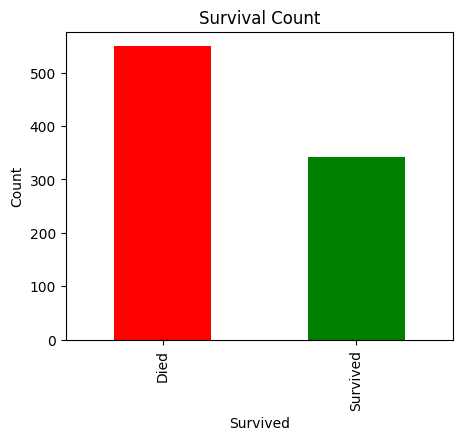

In [31]:

plt.figure(figsize=(5,4))
df['Survived'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0,1], ['Died', 'Survived'])
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()


##Survival rate by Sex

/tmp/ipython-input-3432792497.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.groupby('Sex').apply(lambda g: (g['Survived'] == 1).mean())


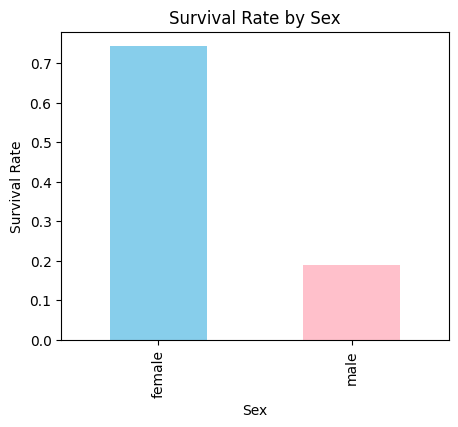

In [30]:

plt.figure(figsize=(5,4))
(df.groupby('Sex').apply(lambda g: (g['Survived'] == 1).mean())
   .plot(kind='bar', color=['skyblue', 'pink']))
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()


## Survival rate by Pclass

/tmp/ipython-input-945022573.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.groupby('Pclass').apply(lambda g: (g['Survived'] == 1).mean())


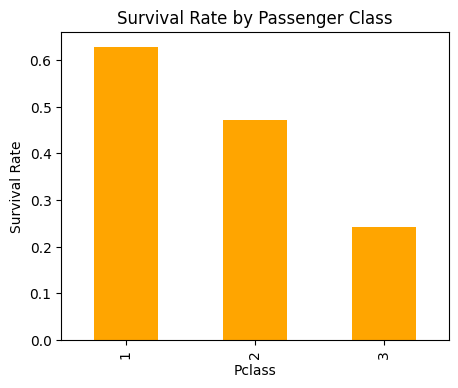

In [34]:

plt.figure(figsize=(5,4))
(df.groupby('Pclass').apply(lambda g: (g['Survived'] == 1).mean())
   .plot(kind='bar', color='orange'))
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()



## Survival rate by Pclass & Sex

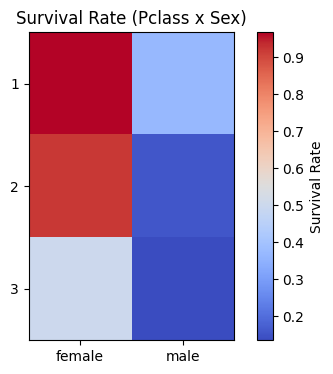

In [35]:

pivot = df.pivot_table(index='Pclass', columns='Sex',
                       values='Survived',
                       aggfunc=lambda x: (x == 1).mean())
plt.figure(figsize=(6,4))
plt.imshow(pivot, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Survival Rate')
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Survival Rate (Pclass x Sex)")
plt.show()


## Correlation heatmap

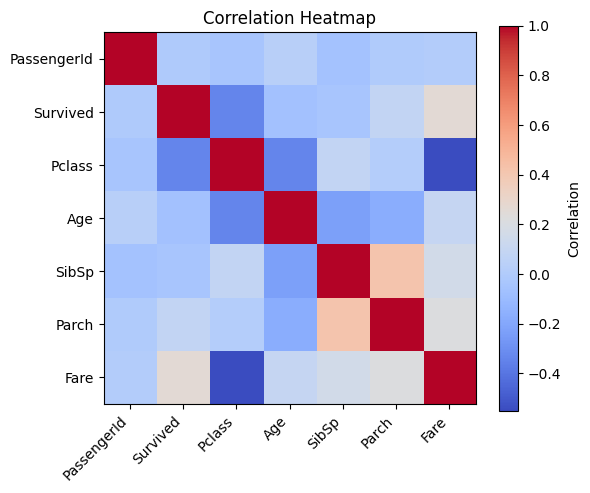

In [33]:

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.show()


## Survival rate by Age group

/tmp/ipython-input-2284762082.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby('AgeGroup').apply(lambda g: (g['Survived'] == 1).mean())
/tmp/ipython-input-2284762082.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.groupby('AgeGroup').apply(lambda g: (g['Survived'] == 1).mean())


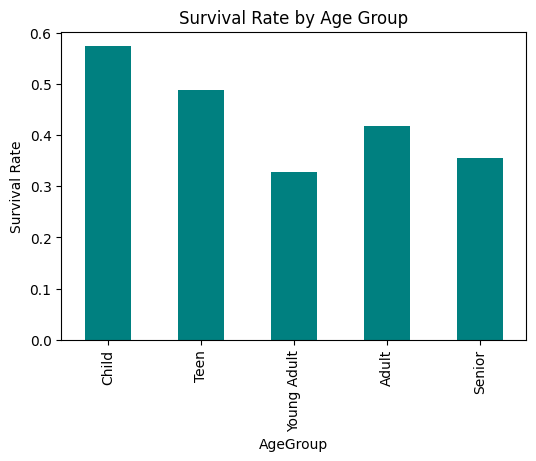

In [37]:

age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(6,4))
(df.groupby('AgeGroup').apply(lambda g: (g['Survived'] == 1).mean())
   .plot(kind='bar', color='teal'))
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.show()

## Age distribution by survival

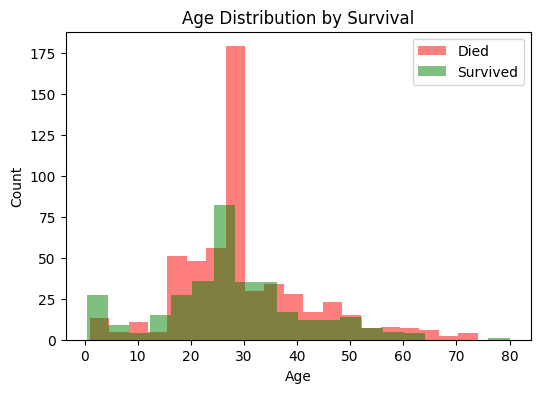

In [38]:

plt.figure(figsize=(6,4))
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Died', color='red')
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Survived', color='green')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


## Numeric pairwise relationships (correlation visual)


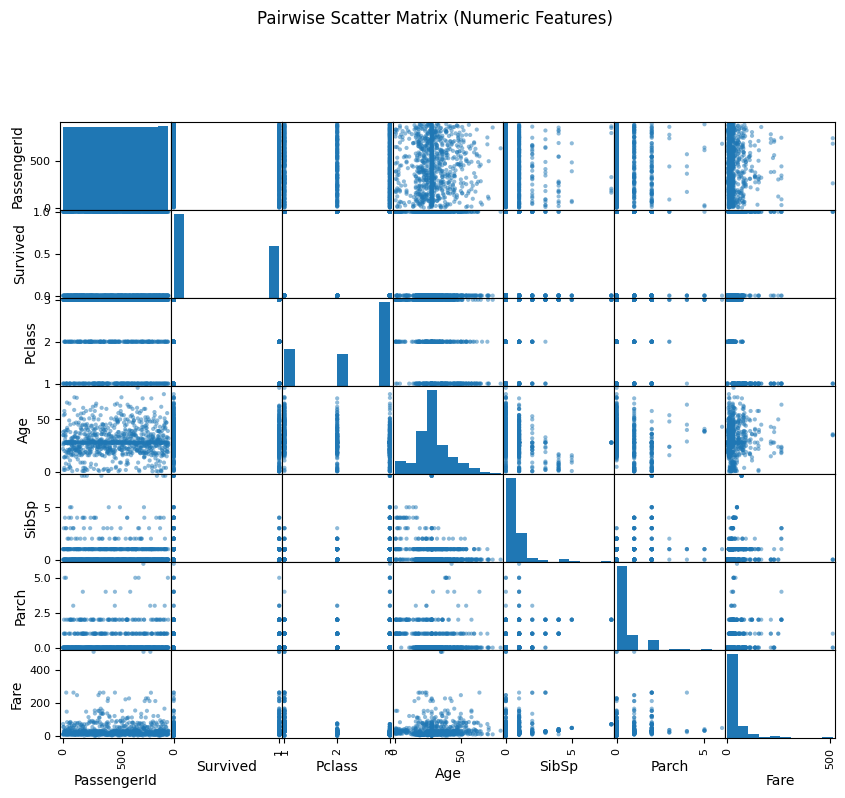

In [39]:

from pandas.plotting import scatter_matrix

numeric_df = df.select_dtypes(include=[np.number])
scatter_matrix(numeric_df, figsize=(10,8), diagonal='hist', alpha=0.5)
plt.suptitle("Pairwise Scatter Matrix (Numeric Features)", y=1.02)
plt.show()